# UK House Price Analysis
## Project Overview

**Objective:**
Explore regional trends in house prices using real government data.

**Dataset Source:**
[UK House Price Index - GOV.UK](https://www.gov.uk/government/statistical-data-sets/uk-house-price-index-data-downloads-january-2022)

**Methods:**
- Cleaned and filtered dataset using Python library 'pandas'
- Converted dates and grouped data by region/year
- Created line, bar, and scatter charts using 'matplotlib' and 'seaborn'
  
**Key Findings:**
- London consistently has the highest prices for detached houses
- All regions show upwards trends in prices, with a spike in 2020
- North East remains the most affordable region

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\user1\OneDrive\Documents\uk-house-prices-project\Average-prices-Property-Type-2022-09.csv')

In [3]:
df.head()

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
0,1995-01-01,Wales,W92000004,66539.58684,32.491063,NaN,NaN,41043.45436,31.399881,NaN,NaN,32506.88477,30.777231,NaN,NaN,34061.27288,34.448112,NaN,NaN
1,1995-01-01,England,E92000001,86314.15895,28.257874,NaN,NaN,51533.22543,27.436474,NaN,NaN,41489.82431,25.279664,NaN,NaN,45218.54082,23.762969,NaN,NaN
2,1995-01-01,Inner London,E13000001,194483.53650,16.399257,NaN,NaN,121073.17000,15.327414,NaN,NaN,87553.48096,14.627111,NaN,NaN,73707.69351,15.492239,NaN,NaN
3,1995-01-01,Outer London,E13000002,160329.96020,22.303302,NaN,NaN,94802.27143,21.065017,NaN,NaN,70087.65516,20.040752,NaN,NaN,58266.86811,21.764751,NaN,NaN
4,1995-01-01,East Midlands,E12000004,68923.93824,30.745262,NaN,NaN,41227.49644,29.322019,NaN,NaN,32870.49385,28.249263,NaN,NaN,30954.76135,32.880529,NaN,NaN


## Project Goals
- Understand trends in UK house prices
- Explore data by property type
- Visualize the data using charts and graphs
- Prepare insights

In [4]:
df.isna().sum()

Date                               0
Region_Name                        0
Area_Code                          0
Detached_Average_Price           345
Detached_Index                   345
Detached_Monthly_Change          754
Detached_Annual_Change          5229
Semi_Detached_Average_Price      333
Semi_Detached_Index              333
Semi_Detached_Monthly_Change     742
Semi_Detached_Annual_Change     5217
Terraced_Average_Price           306
Terraced_Index                   306
Terraced_Monthly_Change          715
Terraced_Annual_Change          5190
Flat_Average_Price                 0
Flat_Index                         0
Flat_Monthly_Change              410
Flat_Annual_Change              4896
dtype: int64

In [5]:
df_cleaned = df[['Date', 'Region_Name', 'Detached_Average_Price', 'Semi_Detached_Average_Price', 'Terraced_Average_Price', 'Flat_Average_Price']]
df_cleaned = df_cleaned.dropna()

In [6]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

In [8]:
regions = ['London', 'North East', 'South West']
df_filtered = df_cleaned[df_cleaned['Region_Name'].isin(regions)]

In [10]:
df_filtered.loc[:, 'Year'] = df_filtered['Date'].dt.year

In [11]:
grouped = df_filtered.groupby(['Region_Name', 'Year'])['Detached_Average_Price'].mean().reset_index()

In [12]:
import matplotlib.pyplot as plt

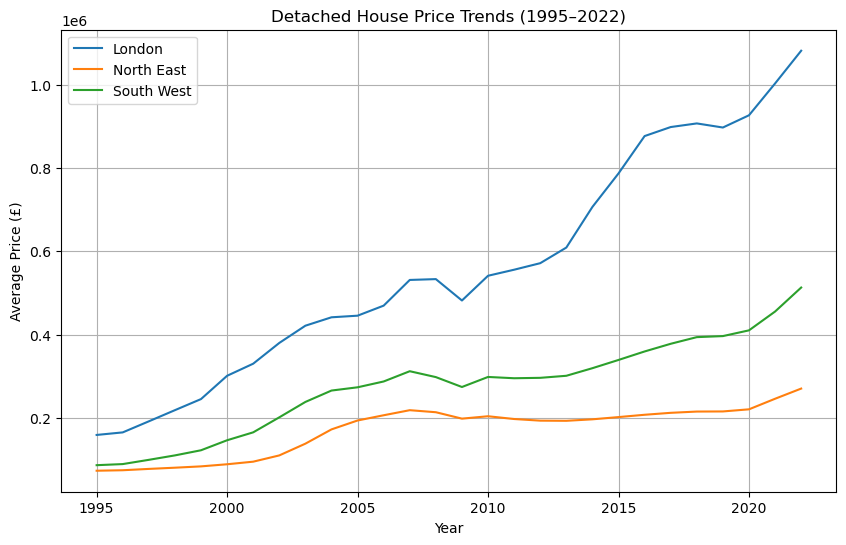

In [19]:
plt.figure(figsize=(10, 6))
for region in regions:
    df_region = grouped[grouped['Region_Name'] == region]
    plt.plot(df_region['Year'], df_region['Detached_Average_Price'], label=region)

plt.title('Detached House Price Trends (1995–2022)')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.legend()
plt.grid(True)
plt.show()


**Analysis:**
London has consistently higher detached house prices with a sharp rise during 2020-2022. The North East remains the most affordable, but all regions show steady growth.


In [17]:
growth = grouped.groupby('Region_Name')['Detached_Average_Price'].agg(['first', 'last'])
growth['Growth'] = growth['last'] - growth['first']
highest_growth_region = growth['Growth'].idxmax()
print(f"Region with highest growth: {highest_growth_region}")

Region with highest growth: London


In [18]:
national = df_filtered.groupby('Year')['Detached_Average_Price'].mean()
yearly_jump = national.diff()
largest_jump_year = yearly_jump.idxmax()
print(f"Year with the largest national price jump: {largest_jump_year}")

Year with the largest national price jump: 2022


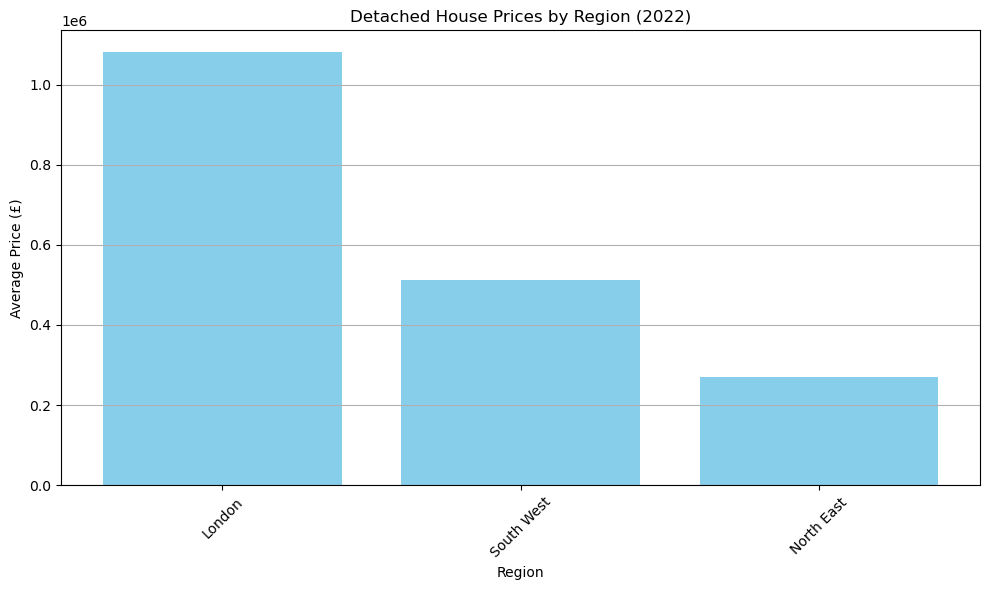

In [23]:
df_2022 = grouped[grouped['Year'] == 2022]
df_2022_sorted = df_2022.sort_values(by='Detached_Average_Price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_2022_sorted['Region_Name'], df_2022_sorted['Detached_Average_Price'], color = 'skyblue')

plt.title('Detached House Prices by Region (2022)')
plt.xlabel('Region')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Analysis:**
London had the highest prices for detached houses in 2022, followed by the South West and the North East. The North East remains the most affordable. The gap between regions is significant.

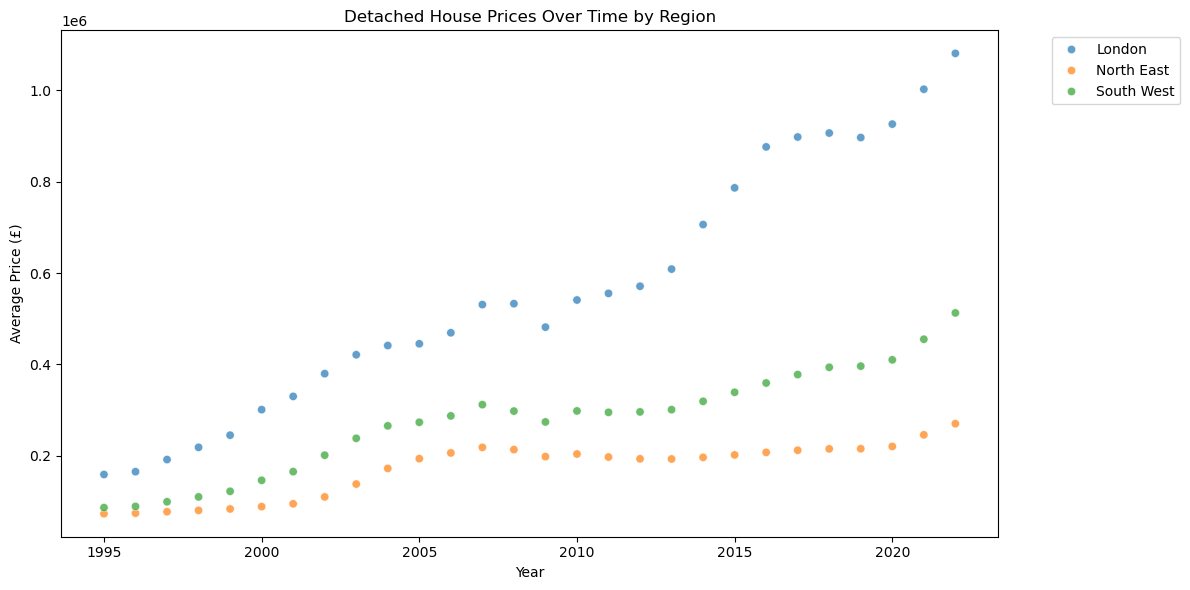

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x='Year', y='Detached_Average_Price', hue='Region_Name', alpha=0.7)

plt.title('Detached House Prices Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis:**
There are consistent price increases across all regions. London stands out with the highest prices, particularly after  a spike in 2020. The South West maintains lower prices than London and the North East remains the most affordable region.